In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.shape

(1984, 5)

In [5]:
df.drop(['Gold Investments', 'Comp Stock', 'Other sharesInvestments'], axis=1,inplace=True)

In [6]:
df.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [7]:
df.shape

(1984, 2)

In [8]:
df.dtypes

Date                object
Oil Investments    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1984 non-null   object 
 1   Oil Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [10]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


In [11]:
df.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [12]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [13]:
df.dtypes

Date               datetime64[ns]
Oil Investments           float64
dtype: object

In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


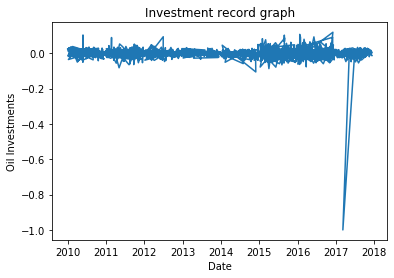

In [16]:
plt.xlabel("Date")
plt.ylabel("Oil Investments")
plt.title("Investment record graph")
plt.plot(df)

In [17]:
#Check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [18]:
result=adfuller(df['Oil Investments'])

In [19]:
print("The values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used")

The values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used


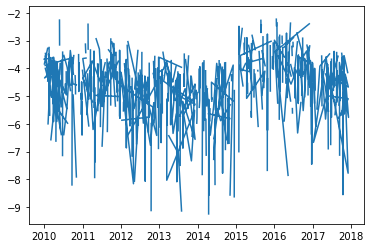

In [20]:
df_logScale=np.log(df)
plt.plot(df_logScale)

In [21]:
 #perform dickey fuller test  
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Oil Investments'],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

Results of dickey fuller test
Test Statistics                 -45.942163
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1983.000000
critical value (1%)              -3.433652
critical value (5%)              -2.862999
critical value (10%)             -2.567547
dtype: float64


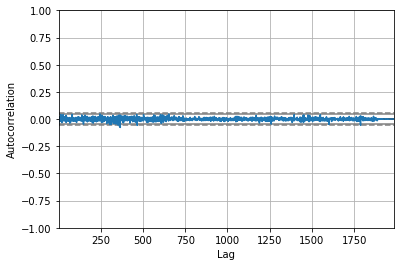

In [22]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

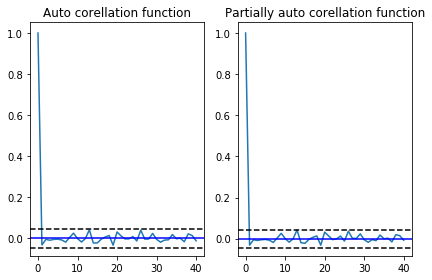

In [24]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df, nlags=40)
pacf= pacf(df, nlags=40,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model = ARIMA (df['Oil Investments'],order=(1,1,1))
model_fit = model.fit()

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.135
Method:                       css-mle   S.D. of innovations              0.031
Date:                Tue, 27 Oct 2020   AIC                          -8154.270
Time:                        21:49:42   BIC                          -8131.900
Sample:                             1   HQIC                         -8146.052
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.547e-06   1.17e-06     -1.320      0.187   -3.84e-06     7.5e-07
ar.L1.D.Oil Investments    -0.0318      0.022     -1.419      0.156      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -736.373      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.4019           +0.0000j           31.4019            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

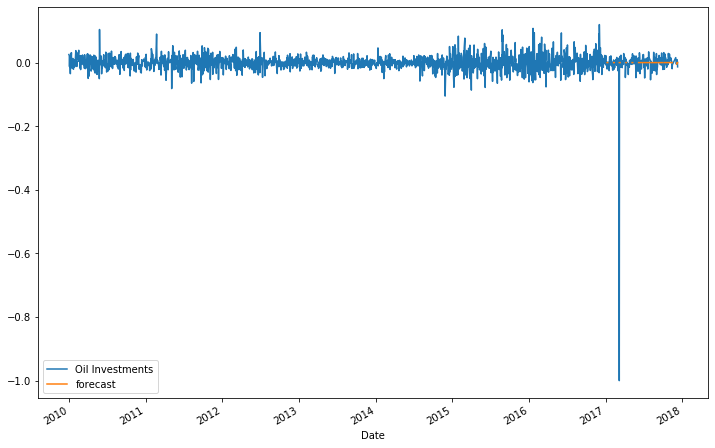

In [28]:
df['forecast']=model_fit.predict(start=1873,end=1982,dynamic = True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [30]:
future_datest_df= pd.DataFrame(index = future_dates [1:], columns=df.columns)

In [31]:
future_datest_df.tail()

,Oil Investments,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN


In [32]:
future_datest_df.tail()

,Oil Investments,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN
